# Polymer Electrolyte Modeling and Discovery (PEMD)

PEMD (Polymer Electrolyte Modeling and Discovery) is an open-source Python package for high-throughput simulation and analysis of polymer electrolytes. It provides an integrated and modular platform that connects:
 - $Polymer$ $Model$ $Construction$ – automated building of homopolymers, copolymers, and complex architectures
 - $OPLS$$-$$AA$ $Force$ $Field$ $Generation$ – parameter assignment and charge fitting for classical simulations
 - $Multiscale$ $Simulation$ – seamless workflows for molecular dynamics and quantum chemistry calculations
 - $Property$ $Analysis$ – transport coefficients, ion solvation structures, electrochemical stability windows, and more

By automating these steps in a unified workflow, PEMD enables reproducible and scalable exploration of polymer electrolytes, facilitating the design of next-generation solid-state battery materials.

##  Polymer Model Construction

This section describes how to automatically build high-quality 3D polymer models from monomer specifications (SMILES/fragments) and construction parameters, enabling downstream force-field generation, molecular dynamics (MD), and quantum-mechanical (QM) calculations.

### **Example 1**: Build homopolymer chain 

In [3]:
from PEMD.core.model import PEMDModel

pdb_filename = PEMDModel.homopolymer(
    work_dir = './', 
    smiles = '*CCO*', 
    length = 30, 
    name = 'PEO', 
    resname = 'MOL', 
    left_cap = '*C', 
    right_cap = '*C'
)

[PEMD] Polymer Model Construction started...

Polymer Build Parameters
┌──────────────┬─────────────┐
│ Parameter    │ Value       │
├──────────────┼─────────────┤
│ Polymer Name │ PEO         │
│ SMILES       │ *CCO*       │
│ Mode         │ Homopolymer │
│ Length       │ 30          │
│ Left Cap     │ *C          │
│ Right Cap    │ *C          │
└──────────────┴─────────────┘


OK Polymer Model Construction PEO_N30.pdb successfully!!!



In [4]:
import os
import py3Dmol

def visualize_structure(input_file, supercell=(1, 1, 1),
                        stick_r=0.18, sphere_r=0.45):
    with open(input_file) as f:
        data = f.read()

    ext = os.path.splitext(input_file)[1].lower()
    fmt = {'.pdb':'pdb', '.xyz':'xyz', '.mol2':'mol2', '.sdf':'sdf', '.cif':'cif', '.gro':'gro'}.get(ext, 'pdb')

    view = py3Dmol.view(width=800, height=550)
    view.setBackgroundColor('#fafafa')
    view.addModel(data, fmt)

    view.setStyle({}, {
        'stick':  {'radius': stick_r, 'colorscheme': 'Jmol'},
        'sphere': {'radius': sphere_r, 'colorscheme': 'Jmol'}
    })

    view.setStyle({'elem': 'Li'}, {
        'stick':  {'radius': stick_r},
        'sphere': {'radius': 0.6, 'color': '#53D397'}
    })

    try:
        view.addUnitCell()
        if any(n > 1 for n in supercell):
            view.replicateUnitCell(*supercell)
    except Exception:
        pass

    view.zoomTo()
    return view.show()

visualize_structure(pdb_filename, supercell=(1, 1, 1))

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### **Example 2**: Build alternating copolymer chain 

In [3]:
from PEMD.core.model import PEMDModel

pdb_filename = PEMDModel.copolymer(
    work_dir = './', 
    smiles_A = '*CCOCO*', 
    smiles_B = '*CC(O*)COCC(C(F)F)(F)F', 
    mode = 'alternating', 
    length = 8
)

                                                         
                        ---------  PPPPPP      EEEEEEEE   MMMMMMMMMM   DDDDDD    ---------                        
                -----------------  PP    PP    EE         MM  MM  MM   DD    DD  -----------------                
        -------------------------  PP    PP    EE         MM  MM  MM   DD    DD  -------------------------        
 --------------------------------  PPPPPP      EEEEEE     MM  MM  MM   DD    DD  -------------------------------- 
        -------------------------  PP          EE         MM  MM  MM   DD    DD  -------------------------        
                -----------------  PP          EE         MM  MM  MM   DD    DD  -----------------                
                        ---------  PP          EEEEEEEE   MM  MM  MM   DDDDDD    ---------                        
       --------------------------------------------------------------------------------------------------- 
                 ** ** ** ** 

In [4]:
visualize_structure(pdb_filename, supercell=(1, 1, 1))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### **Example 3**: Build random copolymer chain 

In [5]:
from PEMD.core.model import PEMDModel

pdb_filename = PEMDModel.copolymer(
    work_dir = './', 
    smiles_A = '*CCOCO*', 
    smiles_B = '*CC(O*)COCC(C(F)F)(F)F', 
    mode = 'random', 
    length = 8
)

                                                         
                        ---------  PPPPPP      EEEEEEEE   MMMMMMMMMM   DDDDDD    ---------                        
                -----------------  PP    PP    EE         MM  MM  MM   DD    DD  -----------------                
        -------------------------  PP    PP    EE         MM  MM  MM   DD    DD  -------------------------        
 --------------------------------  PPPPPP      EEEEEE     MM  MM  MM   DD    DD  -------------------------------- 
        -------------------------  PP          EE         MM  MM  MM   DD    DD  -------------------------        
                -----------------  PP          EE         MM  MM  MM   DD    DD  -----------------                
                        ---------  PP          EEEEEEEE   MM  MM  MM   DDDDDD    ---------                        
       --------------------------------------------------------------------------------------------------- 
                 ** ** ** ** 

In [6]:
visualize_structure(pdb_filename, supercell=(1, 1, 1))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### **Example 4**: Build block copolymer chain 

In [7]:
from PEMD.core.model import PEMDModel

pdb_filename = PEMDModel.copolymer(
    work_dir = './', 
    smiles_A = '*CCOCO*', 
    smiles_B = '*CC(O*)COCC(C(F)F)(F)F', 
    mode = 'block', 
    block_sizes = [4,4]
)

                                                         
                        ---------  PPPPPP      EEEEEEEE   MMMMMMMMMM   DDDDDD    ---------                        
                -----------------  PP    PP    EE         MM  MM  MM   DD    DD  -----------------                
        -------------------------  PP    PP    EE         MM  MM  MM   DD    DD  -------------------------        
 --------------------------------  PPPPPP      EEEEEE     MM  MM  MM   DD    DD  -------------------------------- 
        -------------------------  PP          EE         MM  MM  MM   DD    DD  -------------------------        
                -----------------  PP          EE         MM  MM  MM   DD    DD  -----------------                
                        ---------  PP          EEEEEEEE   MM  MM  MM   DDDDDD    ---------                        
       --------------------------------------------------------------------------------------------------- 
                 ** ** ** ** 

In [8]:
visualize_structure(pdb_filename, supercell=(1, 1, 1))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### **Example 5**: Build polymer chain using the json file

In [9]:
cat homopolymer.json

{
    "polymer": {
        "name": "poly",
        "resname": "MOL",
        "repeating_unit": "*CCO*",
        "left_cap": "",
        "right_cap": "",
        "length": 30
    }
}


In [1]:
from PEMD.core.model import PEMDModel

pdb_filename = PEMDModel.homopolymer_from_json(
    work_dir = './',
    json_file = 'md.json'
)

                                                         
                        ---------  PPPPPP      EEEEEEEE   MMMMMMMMMM   DDDDDD    ---------                        
                -----------------  PP    PP    EE         MM  MM  MM   DD    DD  -----------------                
        -------------------------  PP    PP    EE         MM  MM  MM   DD    DD  -------------------------        
 --------------------------------  PPPPPP      EEEEEE     MM  MM  MM   DD    DD  -------------------------------- 
        -------------------------  PP          EE         MM  MM  MM   DD    DD  -------------------------        
                -----------------  PP          EE         MM  MM  MM   DD    DD  -----------------                
                        ---------  PP          EEEEEEEE   MM  MM  MM   DDDDDD    ---------                        
       --------------------------------------------------------------------------------------------------- 
                 ** ** ** ** 

In [3]:
pdb_filename

('PEO_N6.pdb', 'PEO_N30.pdb')

In [9]:
visualize_structure(pdb_filename, supercell=(1, 1, 1))

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

### **Example 6**: Build Amorphous Cell

In [3]:
from PEMD.core.model import PEMDModel

molecules = {
    'PEO':10,
    'Li':50,
    'TFSI':50,
}

PEMDModel.amorphous_cell(
  work_dir = './MD_dir/',
  molecule_list = molecules,
  density = 0.6, 
  add_length = 25, 
  packinp_name = 'pack.inp', 
  packpdb_name = 'pack_cell.pdb',
)

                                                         
                        ---------  PPPPPP      EEEEEEEE   MMMMMMMMMM   DDDDDD    ---------                        
                -----------------  PP    PP    EE         MM  MM  MM   DD    DD  -----------------                
        -------------------------  PP    PP    EE         MM  MM  MM   DD    DD  -------------------------        
 --------------------------------  PPPPPP      EEEEEE     MM  MM  MM   DD    DD  -------------------------------- 
        -------------------------  PP          EE         MM  MM  MM   DD    DD  -------------------------        
                -----------------  PP          EE         MM  MM  MM   DD    DD  -----------------                
                        ---------  PP          EEEEEEEE   MM  MM  MM   DDDDDD    ---------                        
       --------------------------------------------------------------------------------------------------- 
                 ** ** ** ** 

In [13]:
visualize_structure("pack_cell.pdb", supercell=(1, 1, 1))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

### **Example 7**: Build Amorphous Cell using the json file

In [14]:
cat md.json

{
    "polymer": {
        "name": "PEO_N30",
        "resname": "MOL",
        "repeating_unit": "*CCO*",
        "left_cap": "",
        "right_cap": "",
        "length": [
            6,
            30
        ],
        "numbers": 10,
        "scale": 1.0,
        "charge": 0
    },
    "Li_cation": {
        "name": "Li",
        "resname": "LIP",
        "numbers": 50,
        "smiles": "[Li+]",
        "scale": 0.75,
        "charge": 1
    },
    "salt_anion": {
        "name": "TFSI",
        "resname": "NSC",
        "numbers": 50,
        "smiles": "C(F)(F)(F)(F)S(=O)(=O)[O-]",
        "scale": 0.75,
        "charge": -1
    }
}


In [15]:
from PEMD.core.model import PEMDModel

PEMDModel.amorphous_cell_from_json(
  work_dir = '../',
  json_file = 'md.json',
  density = 0.8, 
  add_length = 25, 
  packinp_name = 'pack.inp', 
  packpdb_name = 'pack_cell.pdb',
)

                                                         
                        ---------  PPPPPP      EEEEEEEE   MMMMMMMMMM   DDDDDD    ---------                        
                -----------------  PP    PP    EE         MM  MM  MM   DD    DD  -----------------                
        -------------------------  PP    PP    EE         MM  MM  MM   DD    DD  -------------------------        
 --------------------------------  PPPPPP      EEEEEE     MM  MM  MM   DD    DD  -------------------------------- 
        -------------------------  PP          EE         MM  MM  MM   DD    DD  -------------------------        
                -----------------  PP          EE         MM  MM  MM   DD    DD  -----------------                
                        ---------  PP          EEEEEEEE   MM  MM  MM   DDDDDD    ---------                        
       --------------------------------------------------------------------------------------------------- 
                 ** ** ** ** 

[23:54:06] Explicit valence for atom # 71 C, 5, is greater than permitted


OK Amorphous Structure Construction pack_cell.pdb successfully!!!



In [16]:
visualize_structure("pack_cell.pdb", supercell=(1, 1, 1))

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

##  OPLS-AA Force Field Generation

PEMD implements a two-stage OPLS-AA workflow that bypasses LigParGen’s ~200-atom cap: (i) parameterize a short segment with LigParGen and convert it to XML via XMLGenerator; (ii) extend to long chains using Foyer’s SMARTS-based atom typing. PEMD emits GROMACS-ready files, supports library or RESP/RESP2 charges, and offers two routes to parameters—oplsaa() (fetch-and-extend) or curated entries from the internal OPLS-AA database.

### **Example 1**: Force Field Generation with LigParGen

In [7]:
from PEMD.core.forcefields import Forcefield

Forcefield.oplsaa(
    work_dir = './', 
    name = 'PEO', 
    resname = 'MOL', 
    ff_source = "ligpargen",
    polymer = True, 
    smiles = '*CCO*', 
    left_cap = '*C', 
    right_cap = '*C',
    pdb_file = 'PEO_N30.pdb',
    scale = 0.7,
    charge = 0
)

                                                         
                        ---------  PPPPPP      EEEEEEEE   MMMMMMMMMM   DDDDDD    ---------                        
                -----------------  PP    PP    EE         MM  MM  MM   DD    DD  -----------------                
        -------------------------  PP    PP    EE         MM  MM  MM   DD    DD  -------------------------        
 --------------------------------  PPPPPP      EEEEEE     MM  MM  MM   DD    DD  -------------------------------- 
        -------------------------  PP          EE         MM  MM  MM   DD    DD  -------------------------        
                -----------------  PP          EE         MM  MM  MM   DD    DD  -----------------                
                        ---------  PP          EEEEEEEE   MM  MM  MM   DDDDDD    ---------                        
       --------------------------------------------------------------------------------------------------- 
                 ** ** ** ** 

### **Example 2**: Force Field Generation from the Internal OPLS-AA Database

In [5]:
from PEMD.core.forcefields import Forcefield

Forcefield.oplsaa(
    work_dir= './',
    name='PEO', 
    ff_source = "database",
    scale = 1,
    charge = 0
)

                                                         
                        ---------  PPPPPP      EEEEEEEE   MMMMMMMMMM   DDDDDD    ---------                        
                -----------------  PP    PP    EE         MM  MM  MM   DD    DD  -----------------                
        -------------------------  PP    PP    EE         MM  MM  MM   DD    DD  -------------------------        
 --------------------------------  PPPPPP      EEEEEE     MM  MM  MM   DD    DD  -------------------------------- 
        -------------------------  PP          EE         MM  MM  MM   DD    DD  -------------------------        
                -----------------  PP          EE         MM  MM  MM   DD    DD  -----------------                
                        ---------  PP          EEEEEEEE   MM  MM  MM   DDDDDD    ---------                        
       --------------------------------------------------------------------------------------------------- 
                 ** ** ** ** 

### **Example 3**: Force Field Generation with LigParGen using the json file

In [8]:
cat md.json

{
    "polymer": {
        "name": "PEO_N30",
        "resname": "MOL",
        "repeating_unit": "*CCO*",
        "left_cap": "*C",
        "right_cap": "*C",
        "length": [
            6,
            30
        ],
        "numbers": 10,
        "scale": 1.0,
        "charge": 0
    },
    "Li_cation": {
        "name": "Li",
        "resname": "LIP",
        "numbers": 50,
        "smiles": "[Li+]",
        "scale": 0.75,
        "charge": 1
    },
    "salt_anion": {
        "name": "TFSI",
        "resname": "NSC",
        "numbers": 50,
        "smiles": "C(F)(F)(F)(F)S(=O)(=O)[O-]",
        "scale": 0.75,
        "charge": -1
    }
}


In [1]:
from PEMD.core.forcefields import Forcefield

Forcefield.oplsaa_from_json(
    work_dir = "./", 
    json_file = "md.json", 
    mol_type = "polymer",  
    ff_source = "ligpargen",
    pdb_file = "PEO_N30.pdb"
)

                                                         
                        ---------  PPPPPP      EEEEEEEE   MMMMMMMMMM   DDDDDD    ---------                        
                -----------------  PP    PP    EE         MM  MM  MM   DD    DD  -----------------                
        -------------------------  PP    PP    EE         MM  MM  MM   DD    DD  -------------------------        
 --------------------------------  PPPPPP      EEEEEE     MM  MM  MM   DD    DD  -------------------------------- 
        -------------------------  PP          EE         MM  MM  MM   DD    DD  -------------------------        
                -----------------  PP          EE         MM  MM  MM   DD    DD  -----------------                
                        ---------  PP          EEEEEEEE   MM  MM  MM   DDDDDD    ---------                        
       --------------------------------------------------------------------------------------------------- 
                 ** ** ** ** 

## Automated Simulations Framework

This notebook automates end-to-end workflows for polymer electrolytes across four stages:

**1) Conformer Search (oligomers & small molecules)**  
- RDKit builds **1000** 3D conformers → MMFF prescreen keeps **100** diverse, low-energy candidates → **GFN1-xTB** refines to **10** → DFT optimizes to **5** minima.

**2) RESP/RESP2 charge fitting (multi-conformer, polymer-aware)**  
- Compute DFT ESP for a representative oligomer; fit **RESP/RESP2** charges with Multiwfn per conformer; average charges atom-wise across the low-energy set.  
- Map charges to arbitrary chain lengths: preserve **n_end** terminal repeats with explicit RESP charges; tile the **repeat-unit-averaged** charges over the interior; renormalize to the target net charge.

**3) MD protocol for transport properties (GROMACS)**  
- PACKMOL amorphous packing at target density → minimization → NVT → simulated-annealing ramp (user-tunable window/rate/control points) to relax entanglements → NPT until volume plateaus.  
- Extract a plateau snapshot and run production at target T (**default 200 ns**).

**4) Oxidative stability window (Eox, polymer–anion model)**  
- Extract ion–polymer clusters from MD by first-shell coordination; cap segments; perform dielectric-corrected DFT.  
- Compute the adiabatic ionization voltage:
$$
E_{\mathrm{ox}}(\mathrm{V\ vs\ Li/Li^+})
=-\frac{G(M)-G(M^+)}{F}-1.46\ \mathrm{V},
$$

### **Example 1**: Oligomer Conformer Search

In [2]:
from PEMD.core.run import QMRun

xyz_file = QMRun.conformer_search(
    work_dir = './', 
    smiles = 'CCO', 
    max_conformers = 1000, 
    top_n_MMFF = 100, 
    top_n_xtb = 10, 
    top_n_qm = 4,
    charge = 0,
    mult = 1,
    gfn = 'gfn2',
    function = 'b3lyp',
    basis_set = '6-31g*',
    epsilon = 2.0,
    core = 32,
    memory = '64GB',
)

                                                         
                        ---------  PPPPPP      EEEEEEEE   MMMMMMMMMM   DDDDDD    ---------                        
                -----------------  PP    PP    EE         MM  MM  MM   DD    DD  -----------------                
        -------------------------  PP    PP    EE         MM  MM  MM   DD    DD  -------------------------        
 --------------------------------  PPPPPP      EEEEEE     MM  MM  MM   DD    DD  -------------------------------- 
        -------------------------  PP          EE         MM  MM  MM   DD    DD  -------------------------        
                -----------------  PP          EE         MM  MM  MM   DD    DD  -----------------                
                        ---------  PP          EEEEEEEE   MM  MM  MM   DDDDDD    ---------                        
       --------------------------------------------------------------------------------------------------- 
                 ** ** ** ** 

### **Example 2**: RESP Charge Fitting

In [1]:
from PEMD.core.run import QMRun

df = QMRun.resp_chg_fitting(
    work_dir = './', 
    xyz_file = 'gaussian_top4.xyz',
    charge = 0,
    mult = 1,
    function = 'b3lyp',
    basis_set = '6-311+g(d,p)',
    epsilon = 5.0,
    core = 32,
    memory = '64GB',
    method = 'resp2',
)

                                                         
                        ---------  PPPPPP      EEEEEEEE   MMMMMMMMMM   DDDDDD    ---------                        
                -----------------  PP    PP    EE         MM  MM  MM   DD    DD  -----------------                
        -------------------------  PP    PP    EE         MM  MM  MM   DD    DD  -------------------------        
 --------------------------------  PPPPPP      EEEEEE     MM  MM  MM   DD    DD  -------------------------------- 
        -------------------------  PP          EE         MM  MM  MM   DD    DD  -------------------------        
                -----------------  PP          EE         MM  MM  MM   DD    DD  -----------------                
                        ---------  PP          EEEEEEEE   MM  MM  MM   DDDDDD    ---------                        
       --------------------------------------------------------------------------------------------------- 
                 ** ** ** ** 

### **Example 3**: Molecular Dynamics Simulation Protocol for Polymer Electrolytes

See python scripts in github

### **Example 4**: Oxidative stability window Calculation
See python scripts in github

### **Example 5**: Frontier Orbital Energy Calculation
See python scripts in github

##  Post-processing and Analysis.

PEMD provides broad property analyses of polymer electrolytes, including transport properties, transport mechanisms, and electrochemical stability.



# Example 1: Calculate Transport Properties

 - Conductivity
 - Self-diffusion coefficient
 - Cation transference number

In [4]:
from PEMD.core.analysis import PEMDAnalysis

select_dict = {
    "cation": "resname LIP and name Li",
    "anion": "resname NSC and name OBT",
    "polymer": "resname MOL and name O",
}

analysis = PEMDAnalysis.from_gromacs(
    work_dir = '/home/tsd/polymer/MD/PEO/373/0.05/0_SN/1_sample/1_sample/MD_dir/',
    tpr_file = "nvt_prod.tpr",
    wrap_xtc_file = "nvt_prod.xtc",
    unwrap_xtc_file = "nvt_prod_unwrap.xtc",
    select_dict = select_dict,
    cation_name = "cation",
    anion_name = "anion",
    polymer_name = "polymer",
    run_start = 0,
    run_end = 80001,
    dt = 0.001,
    dt_collection = 5e3,
    temperature = 353,
)

### Calculate conductivity

In [ ]:
cond = analysis.conductivity(save_csv=True, plot=True,  )

print(f"conductivity = {cond:.2f} mS/cm")

Calculating conductivity:   0%|          | 0/80001 [00:00<?, ?it/s]

### Calculate self-diffusion coefficient

  0%|          | 0/80001 [00:00<?, ?it/s]

Calculating MSD:   0%|          | 0/50 [00:00<?, ?it/s]

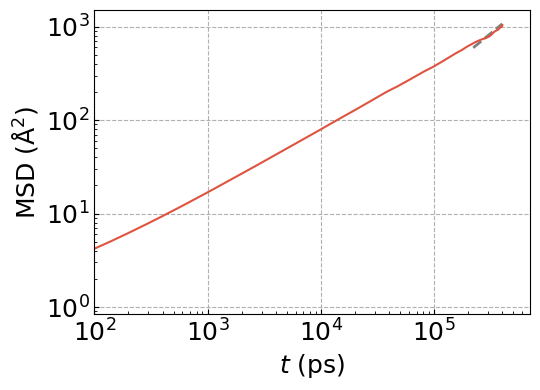

D₊ = 4.092e-08 cm²/s


In [26]:
# Calculate diffusion coefficient

D_cations = analysis.diffusion_coefficient(cation_name, save_csv=True, plot=True)

print(f"D₊ = {D_cations:.3e} cm²/s")

Calculating MSD:   0%|          | 0/50 [00:00<?, ?it/s]

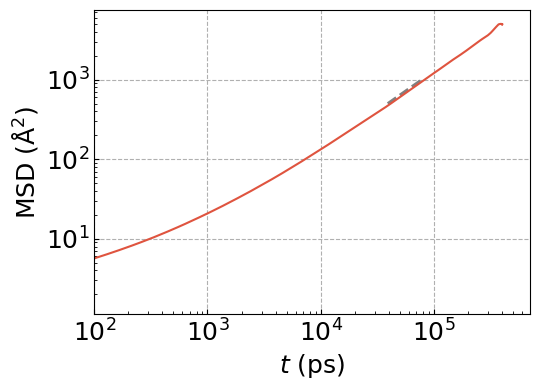

D₋ = 2.030e-07 cm²/s


In [28]:
D_anions = analysis.diffusion_coefficient(anion_name, save_csv=True, plot=True)

print(f"D₋ = {D_anions:.3e} cm²/s")

### Calculate transfer number

In [27]:
t = analysis.transfer_number()

print(f"t₊ = {t:.2f}")

  0%|          | 0/80001 [00:00<?, ?it/s]

Calculating conductivity:   0%|          | 0/80001 [00:00<?, ?it/s]

t₊ = 0.36


# Example 2: Calculate transport mechanisms 

 - Coordination number
 - Polymer cation transport mechanisms: backbone sliding (τ1), segmental-coupled motion (τ2), and intersegment transfer (τ3).
 - Solvation structure distributions
 - Ion clustering statistics
 - Residence time

### Calculate coordination number

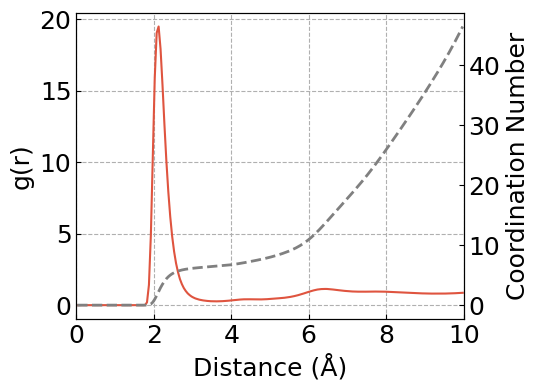

Li⁺–PEO coordination number n: 6.46


In [30]:
coord_Li_PEO = analysis.coordination_number(cation_name, polymer_name, save_csv=True, plot=True)

print(f"Li⁺–PEO coordination number: {float(coord_Li_PEO):.2f}")

### Calculate polymer cation transport mechanism 

In [31]:
tau3 = analysis.tau3()

Processing trajectory:   0%|          | 0/80001 [00:00<?, ?it/s]

  0%|          | 0/2001 [00:00<?, ?it/s]

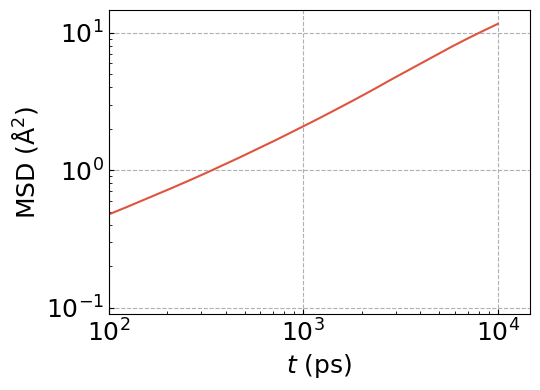

In [32]:
tau1 = analysis.tau1(time_window=2001, save_csv=False, plot=True)

Calculating MSD:   0%|          | 0/1000 [00:00<?, ?it/s]

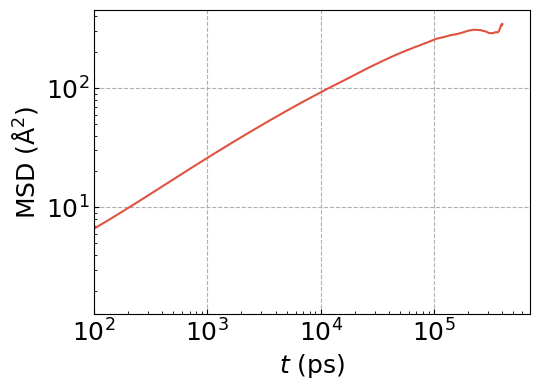

Calculating end-to-end distance:   0%|          | 0/80001 [00:00<?, ?it/s]

In [33]:
tauR = analysis.tauR(save_csv=False, plot=True)

  0%|          | 0/501 [00:01<?, ?it/s]

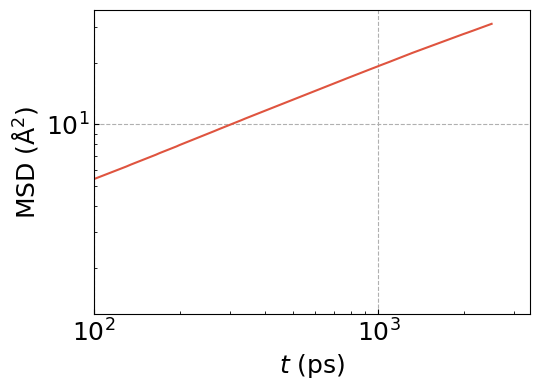

In [34]:
tau2 = analysis.tau2(time_window=501, save_csv=False, plot=True)

### Calculate Residence time

In [ ]:
from PEMD.core.analysis import PEMDAnalysis

select_dict = {
    "cation": "resname LIP and name Li",
    "anion": "resname NSC and name OBT",
    "polymer": "resname MOL and name O",
}

distance_dict = {
    "anion": "3.3",
    "polymer": "3.7",
} 

analysis = PEMDAnalysis.from_gromacs(
    work_dir = '/home/tsd/polymer/MD/PEO/373/0.05/0_SN/1_sample/1_sample/MD_dir/',
    tpr_file = "nvt_prod.tpr",
    wrap_xtc_file = "nvt_prod.xtc",
    unwrap_xtc_file = "nvt_prod_unwrap.xtc",
    select_dict = select_dict,
    cation_name = "cation",
    anion_name = "anion",
    polymer_name = "polymer",
    run_start = 0,
    run_end = 80001,
    dt = 0.001,
    dt_collection = 5e3,
    temperature = 353,
)

acf_avg = analysis.calc_neigh_corr(
    distance_dict, 
    center_atom = "cation"
)

analysis.fit_residence_time(
    acf_avg, 
    cutoff_time=1000, 
    save_csv=False, 
    plot=True
)

                                                         
                        ---------  PPPPPP      EEEEEEEE   MMMMMMMMMM   DDDDDD    ---------                        
                -----------------  PP    PP    EE         MM  MM  MM   DD    DD  -----------------                
        -------------------------  PP    PP    EE         MM  MM  MM   DD    DD  -------------------------        
 --------------------------------  PPPPPP      EEEEEE     MM  MM  MM   DD    DD  -------------------------------- 
        -------------------------  PP          EE         MM  MM  MM   DD    DD  -------------------------        
                -----------------  PP          EE         MM  MM  MM   DD    DD  -----------------                
                        ---------  PP          EEEEEEEE   MM  MM  MM   DDDDDD    ---------                        
       --------------------------------------------------------------------------------------------------- 
                 ** ** ** ** 

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

### Calculate the Distribution of Solvation Coordination Types (SSIP/CIP/AGG)

                                                         
                        ---------  PPPPPP      EEEEEEEE   MMMMMMMMMM   DDDDDD    ---------                        
                -----------------  PP    PP    EE         MM  MM  MM   DD    DD  -----------------                
        -------------------------  PP    PP    EE         MM  MM  MM   DD    DD  -------------------------        
 --------------------------------  PPPPPP      EEEEEE     MM  MM  MM   DD    DD  -------------------------------- 
        -------------------------  PP          EE         MM  MM  MM   DD    DD  -------------------------        
                -----------------  PP          EE         MM  MM  MM   DD    DD  -----------------                
                        ---------  PP          EEEEEEEE   MM  MM  MM   DDDDDD    ---------                        
       --------------------------------------------------------------------------------------------------- 
                 ** ** ** ** 

  0%|          | 0/49 [00:00<?, ?it/s]

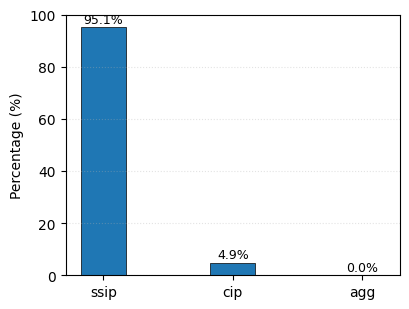

,Solvation structure,Percentage
0,ssip,95.0980%
1,cip,4.8940%
2,agg,0.0080%


In [1]:
from PEMD.core.analysis import PEMDAnalysis

select_dict = {
    "cation": "resname LIP and name Li",
    "anion": "resname NSC and name OBT",
    "polymer": "resname MOL and name O",
}

distance_dict = {
    "anion": "3.3",
    "polymer": "3.7",
} 

analysis = PEMDAnalysis.from_gromacs(
    work_dir = '/home/tsd/polymer/MD/PEO/373/0.05/0_SN/1_sample/1_sample/MD_dir/',
    tpr_file = "nvt_prod.tpr",
    wrap_xtc_file = "nvt_prod.xtc",
    unwrap_xtc_file = "nvt_prod_unwrap.xtc",
    select_dict = select_dict,
    cation_name = "cation",
    anion_name = "anion",
    polymer_name = "polymer",
    run_start = 0,
    run_end = 80001,
    dt = 0.001,
    dt_collection = 5e3,
    temperature = 353,
)

analysis.coordination_type(
    run_start = 1000, 
    run_end = 2000, 
    distance_dict = distance_dict, 
    center_atom = "cation", 
    counter_atom = "anion",
    plot=True
)

### Calculate Ion Clustering Population

In [9]:
from PEMD.core.analysis import PEMDAnalysis

select_dict = {
    "cation": "resname LIP and name Li",
    "anion": "resname NSC and name OBT",
    "polymer": "resname MOL and name O",
}

distance_dict = {
    "anion": "3.3",
    "polymer": "3.7",
} 

analysis = PEMDAnalysis.from_gromacs(
    work_dir = '/home/tsd/polymer/MD/PEO/353/0.2/0_SN/1_sample/MD_dir',
    tpr_file = "nvt_prod.tpr",
    wrap_xtc_file = "nvt_prod.xtc",
    unwrap_xtc_file = "nvt_prod_unwrap.xtc",
    select_dict = select_dict,
    cation_name = "cation",
    anion_name = "anion",
    polymer_name = "polymer",
    run_start = 0,
    run_end = 80001,
    dt = 0.001,
    dt_collection = 5e3,
    temperature = 353,
)

In [ ]:
analysis.ion_cluster_population(
    run_start = 1000, 
    run_end = 2000, 
    center_atom = "cation", 
    counter_atom = "anion",
    core = 4, 
    plot = True
)

Processing trajectory:   0%|          | 0/1000 [00:00<?, ?it/s]

# Example 3: Calculate electrochemical stability

 - The frontier orbital energies
 - electrochemical stability window

### Calculate the frontier orbital energies

In [1]:
from PEMD.core.analysis import PEMDAnalysis

work_dir = '/home/tsd/esw/1/QM_dir/'
PEMDAnalysis.homo_lumo_energy(
    work_dir, 
    log_filename = 'conf_9.log'
)

                                                         
                        ---------  PPPPPP      EEEEEEEE   MMMMMMMMMM   DDDDDD    ---------                        
                -----------------  PP    PP    EE         MM  MM  MM   DD    DD  -----------------                
        -------------------------  PP    PP    EE         MM  MM  MM   DD    DD  -------------------------        
 --------------------------------  PPPPPP      EEEEEE     MM  MM  MM   DD    DD  -------------------------------- 
        -------------------------  PP          EE         MM  MM  MM   DD    DD  -------------------------        
                -----------------  PP          EE         MM  MM  MM   DD    DD  -----------------                
                        ---------  PP          EEEEEEEE   MM  MM  MM   DDDDDD    ---------                        
       --------------------------------------------------------------------------------------------------- 
                 ** ** ** ** 

,Name,Energy
0,HOMO,-6.615088 eV
1,LUMO,-2.170652 eV


### Calculate the oxidation potentials

In [ ]:
from PEMD.core.analysis import PEMDAnalysis

work_dir = './'
Eox = PEMDAnalysis.esw(
    work_dir,
    logfile_init = "PEO_init.log",
    logfile_oxid = "PEO_oxid.log",
    output = "eox",
)

print(Eox)